# CZ3006 Lab 4 - Network Traffic Analysis

## read data

In [2]:
import pandas as pd


dataframe = pd.read_csv('data/test_SFLow_data.csv')
dataframe.head()

,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012,3012.1,152.3.219.19,...,50,0x00,245,0,0.1,0x00.1,1518,1496,2048,Unnamed: 20
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


## add own column names (since column names not given)

In [3]:
dataframe.columns = [
    'type',
    'sflow_agent_ip',
    'input_port',
    'output_port',
    'source_mac',
    'destination_mac',
    'ethernet_type',
    'in_vlan',
    'out_vlan',
    'source_ip',
    'destination_ip',
    'ip_protocol',
    'ip_type_of_service',
    'ip_ttime_to_live',
    'source_port',
    'destination_port',
    'tcp_flags',
    'packet_size',
    'ip_size',
    'sampling_rate',
    '_',
]
print(dataframe.columns)

Index(['type', 'sflow_agent_ip', 'input_port', 'output_port', 'source_mac',
       'destination_mac', 'ethernet_type', 'in_vlan', 'out_vlan', 'source_ip',
       'destination_ip', 'ip_protocol', 'ip_type_of_service',
       'ip_ttime_to_live', 'source_port', 'destination_port', 'tcp_flags',
       'packet_size', 'ip_size', 'sampling_rate', '_'],
      dtype='object')


In [4]:
dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,...,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate,_
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


## drop last column (empty column)

In [5]:
dataframe = dataframe.drop('_', axis=1)
dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,destination_ip,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048


## check for NaNs

In [6]:
dataframe_has_nan = False
for column in dataframe.columns:
    if dataframe[column].isna().values.any():
        print(f'{column} has NaN values')
        dataframe_has_nan = True

if dataframe_has_nan:
    print('dataframe has NaN values')
else:
    print('dataframe does not have NaN values')

dataframe does not have NaN values


### no NaNs! good - time to start analysing the data

## 4A - Top 5 talkers

In [7]:
print(dataframe.source_ip.value_counts().nlargest(5))

152.3.219.19       125
207.241.228.157     66
130.14.250.13       63
193.62.192.8        46
192.122.131.36      40
Name: source_ip, dtype: int64


### top 5 talker organisations

- 152.3.219.19 - Duke University
- 207.241.228.157 - Internet Archive
- 130.14.250.13 - National Library of Medicine
- 193.62.192.8 - RIPE Network Coordination Centre
- 192.122.131.36 - Asia Pacific Network Information Centre

[reference](https://who.is/)

## 4A - Top 5 listeners

In [8]:
print(dataframe.destination_ip.value_counts().nlargest(5))

198.71.44.98      125
103.37.198.100     98
210.48.222.9       66
137.132.228.15     50
202.21.159.244     38
Name: destination_ip, dtype: int64


### top 5 listener organisations

- 198.71.44.98 - Internet2
- 103.37.198.100 - Asia Pacific Network Information Centre
- 210.48.222.9 - Asia Pacific Network Information Centre
- 137.132.228.15 - Asia Pacific Network Information Centre
- 202.21.159.244 - Asia Pacific Network Information Centre

[reference](https://who.is/)

## 4B - Transport Protocols

In [9]:
print(dataframe.ip_protocol.value_counts())

6      879
50     139
17     135
0       28
47      14
41       2
381      1
1        1
Name: ip_protocol, dtype: int64


### protocols

- 6 - Transmission Control Protocol (TCP)
- 50 - Encapsulating Security Payload (ESP)
- 17 - User Datagram Protocol (UDP)
- 0 - IPv6 Hop-by-Hop Option (HOPOPT)
- 47 - Generic Routing Encapsulation (GREs)
- 41 - IPv6 Encapsulation (IPv6)
- 381 - ?
- 1 - Internet Control Message Protocol (ICMP)

[reference](https://en.wikipedia.org/wiki/List_of_IP_protocol_numbers)

### transport protocols number of packets

- TCP: 879
- UDP: 135

[reference](https://en.wikipedia.org/wiki/Transport_layer#Protocols)

## 4C - Applications Protocols

In [10]:
# question did not specify top n
# set n as 10, then use top 5 in answer
print(dataframe.destination_port.value_counts().nlargest(10))

443      234
56152     82
0         81
43930     45
80        37
52866     32
4789      29
44476     21
57435     18
4920      13
Name: destination_port, dtype: int64


### top 5 application service and packets

- 443 - HTTPS - 234
- 56152 - dynamic / private port (unknown) - 82
- 0 - wildcard port - 81
- 43930 - registered port (unknown) - 45
- 80 - HTTP - 37

## 4D - Traffic Intensity

In [11]:
print(f'total traffic (MB): {dataframe.ip_size.sum() / 2**(10*2)}')

total traffic (MB): 1.0284299850463867


## 4E - Top 5 communication pair

In [12]:
# reference: https://www.reddit.com/r/learnpython/comments/7s99rk/pandas_sort_by_most_frequent_value_combinations/dt2z7fm?utm_source=share&utm_medium=web2x

# unidirectional
print(
    dataframe
        .groupby(['source_ip', 'destination_ip'])
        .size()
        .sort_values(ascending=False)
        .nlargest(10)
)

source_ip        destination_ip 
152.3.219.19     198.71.44.98       125
207.241.228.157  210.48.222.9        66
130.14.250.13    103.37.198.100      63
193.62.192.8     137.132.228.15      46
130.14.250.11    103.37.198.100      35
137.132.228.15   193.62.192.8        35
192.122.131.36   216.58.203.234      34
140.112.8.139    103.21.126.2        32
14.139.196.58    192.101.107.153     30
203.185.93.2     203.30.39.13        21
dtype: int64


### top communication pairs are obtained but they are unidirectional

(ip_1 as source and ip_2 as destination) != (ip_2 as source and ip_1 as destination)

### create a new column where source / destination does not matter

In [13]:
pair_list = []

for ip_1, ip_2 in zip(dataframe.source_ip, dataframe.destination_ip):
    if ip_1 < ip_2:
        pair_list.append(ip_1 + ' - ' + ip_2)
    else:
        pair_list.append(ip_2 + ' - ' + ip_1)

dataframe.ip_pair = pd.Series(pair_list)

dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,destination_ip,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048


### find top communication pairs (bidirectional)

In [14]:
print(dataframe.ip_pair.value_counts().nlargest(10))

152.3.219.19 - 198.71.44.98        136
137.132.228.15 - 193.62.192.8       81
207.241.228.157 - 210.48.222.9      79
103.37.198.100 - 130.14.250.13      70
192.122.131.36 - 216.58.203.234     47
103.37.198.100 - 130.14.250.11      40
103.21.126.2 - 140.112.8.139        32
14.139.196.58 - 192.101.107.153     30
203.80.21.4 - 61.252.52.21          29
104.44.201.152 - 202.21.159.244     22
dtype: int64


### Voilà!

## 4E - Visualising the communication between the different IP hosts

### create a dataframe that records the number of packets sent from source IP address to destination IP address

In [15]:
# reference: https://stackoverflow.com/a/40872584/9171260
grouped_dataframe = dataframe.groupby(['source_ip', 'destination_ip']).size().sort_values(ascending=False).to_frame('packets_sent').reset_index()
grouped_dataframe.head()

,source_ip,destination_ip,packets_sent
0,152.3.219.19,198.71.44.98,125
1,207.241.228.157,210.48.222.9,66
2,130.14.250.13,103.37.198.100,63
3,193.62.192.8,137.132.228.15,46
4,130.14.250.11,103.37.198.100,35


In [16]:
import igraph

### plot graph / network using the dataframe created earlier

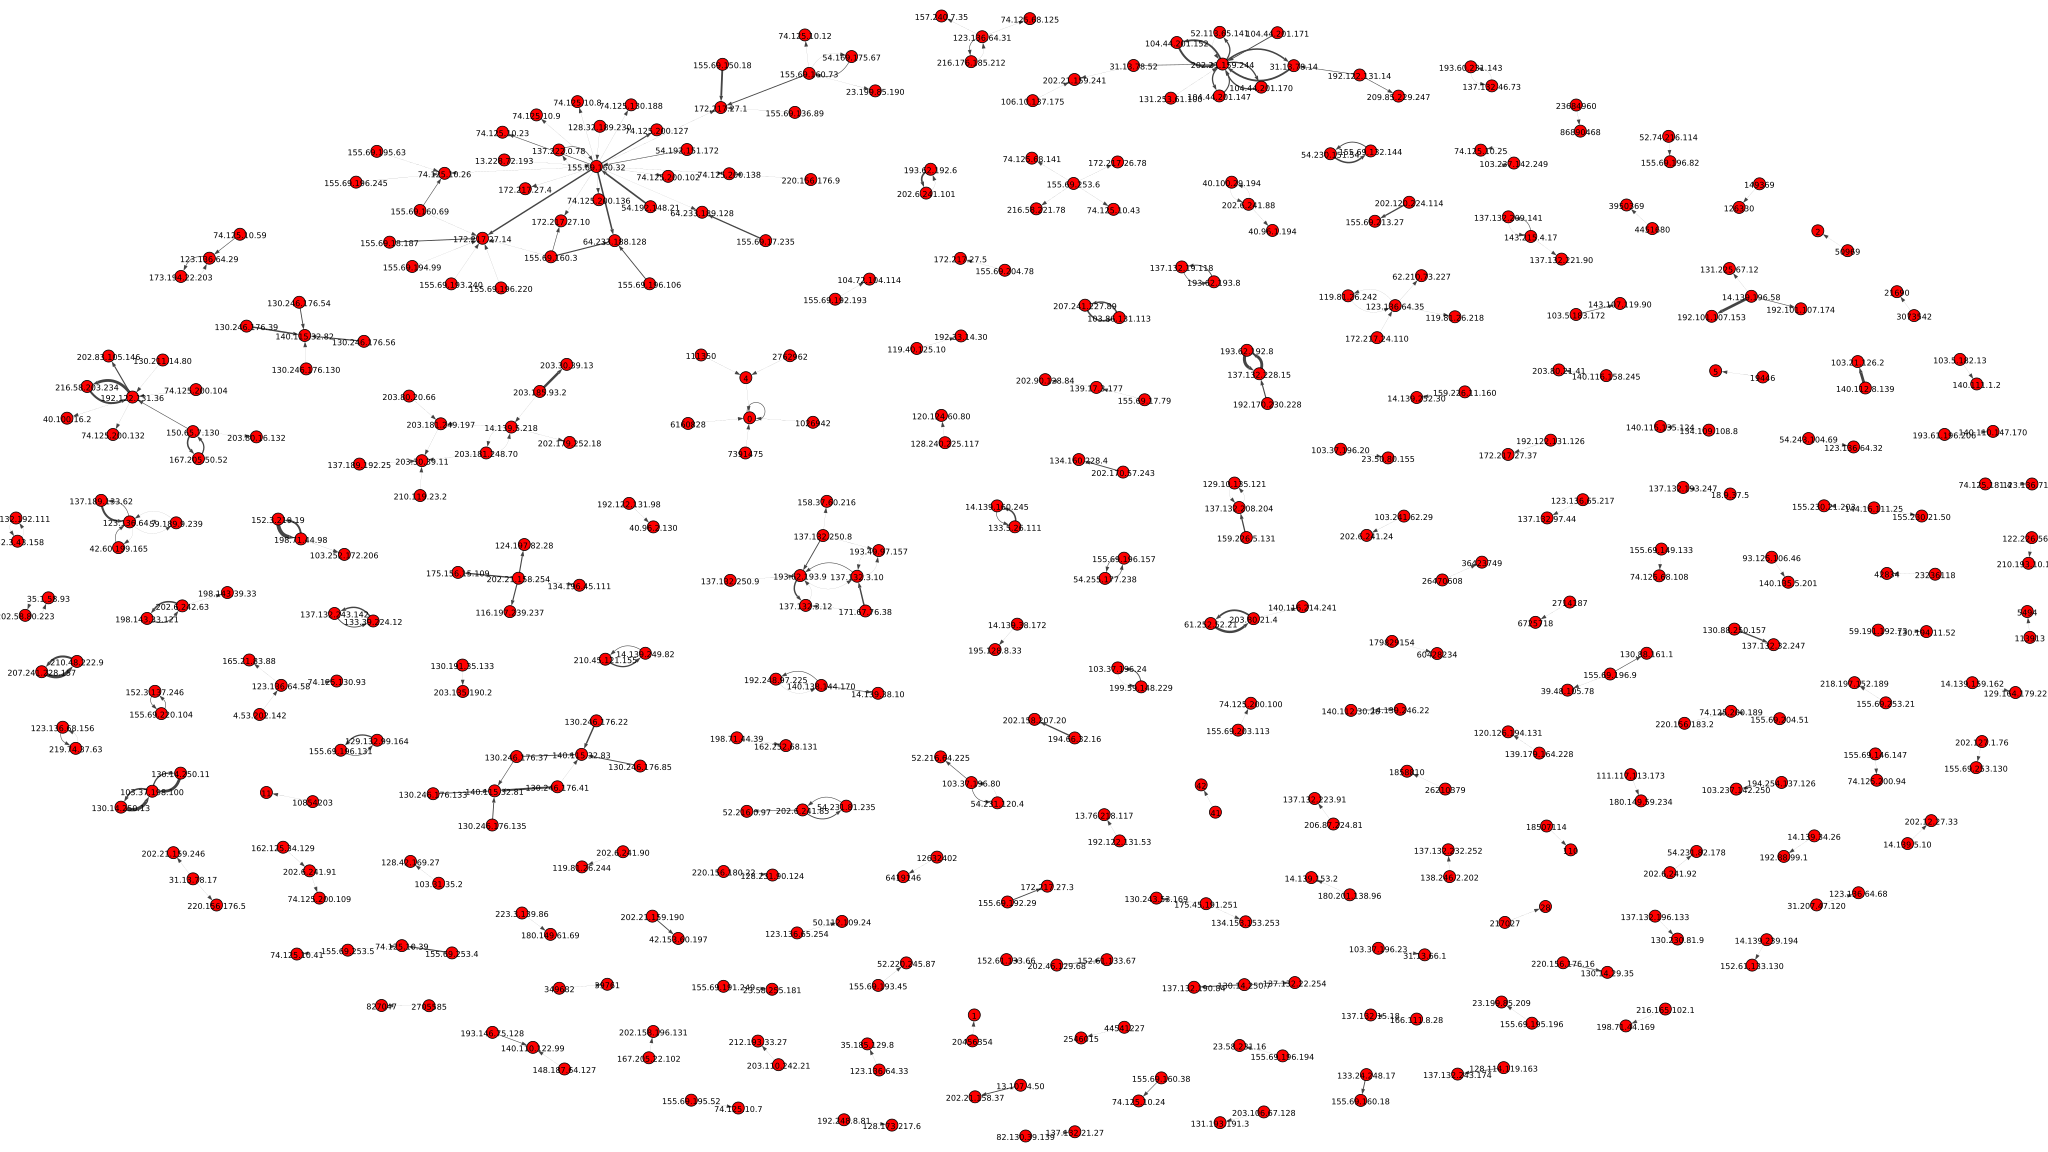

In [17]:
# reference: https://stackoverflow.com/a/51901291/9171260
tuple_list = [tuple(row) for row in grouped_dataframe.to_numpy()]

computer_network = igraph.Graph.TupleList(
    tuple_list, 
    directed=True, 
    weights=True, 
)

computer_network.vs['size'] = 15
computer_network.vs['label_size'] = 10
computer_network.vs['label'] = computer_network.vs['name']

import math

computer_network.es['width'] =  [
    max(math.log(weight), 0.1)
    for weight in computer_network.es['weight']
]

computer_network.es['arrow_size'] = 0.5

layout = computer_network.layout('fr')
igraph.plot(computer_network, layout=layout, bbox=(2560, 1440))

### observations

most IP addresses' organisation is Asia Pacific Network Information Centre (APNIC)

some IP addresses with high degree centrality / high number of connections:

- 155.69.160.32 (biggest cluster) - belongs to APNIC
- 172.217.27.14 (directly below 155.69.160.32) - belongs to Google LLC
- 192.122.131.36 (to the top-right of 155.69.160.32) - belongs to APNIC
- 202.21.159.244 (to the right of 192.122.131.36) - belongs to APNIC

some IP addresses with high transmission intensity between them:

- 14.139.196.58 to 192.101.107.153 - APNIC to Pacific Northwest National Laboratory (PNNL-Z)
- between 193.62.192.8 and 137.132.228.15 - RIPE Network Coordination Centre (RIPE) and APNIC

there exists some IP addresses(?) that do not look like typical IP addresses - got to investigate

### check "abnormal IP addresses"

In [18]:
for source_ip, destination_ip in zip(dataframe.source_ip, dataframe.destination_ip):
    if len(source_ip.split('.')) != 4 or len(destination_ip.split('.')) != 4:
        print('abnormal IP address; source IP:', source_ip, 'destination IP:', destination_ip)

abnormal IP address; source IP: 0 destination IP: 0
abnormal IP address; source IP: 50969 destination IP: 2
abnormal IP address; source IP: 20456354 destination IP: 1
abnormal IP address; source IP: 2714187 destination IP: 6725718
abnormal IP address; source IP: 23236118 destination IP: 42834
abnormal IP address; source IP: 179829154 destination IP: 60428234
abnormal IP address; source IP: 7391475 destination IP: 0
abnormal IP address; source IP: 10854203 destination IP: 11
abnormal IP address; source IP: 44541227 destination IP: 2546015
abnormal IP address; source IP: 1026942 destination IP: 0
abnormal IP address; source IP: 349682 destination IP: 39761
abnormal IP address; source IP: 0 destination IP: 0
abnormal IP address; source IP: 113913 destination IP: 5494
abnormal IP address; source IP: 12632402 destination IP: 6419146
abnormal IP address; source IP: 26210379 destination IP: 1858810
abnormal IP address; source IP: 3073542 destination IP: 21690
abnormal IP address; source IP: 2

### these addresses appear to be in base-10 decimal notation

[reference](https://itstillworks.com/convert-ip-addresses-decimal-format-7611714.html)

[how to convert to dotted decimal](https://consciousvibes.com/wp/tech/networking/ip-address-conversion/)

[example conversion](https://consciousvibes.com/wp/wp-content/uploads/2018/09/ConvertingToBase256FromDecimal.pdf)

### define a function to convert to dotted decimal

In [30]:
def decimal_to_dotted_decimal(decimal_ip: int):
    ip_as_list = ['0', '0', '0', '0']

    for index in range(3, -1, -1):
        if decimal_ip < 256:
            ip_as_list[index] = str(decimal_ip)
            break
        
        quotient = decimal_ip // 256
        ip_as_list[index] = str(decimal_ip - quotient * 256)
        
        decimal_ip = quotient

    return '.'.join(ip_as_list)

### convert decimal IP addresses to dotted-decimal

In [34]:
for source_ip, destination_ip in zip(dataframe.source_ip, dataframe.destination_ip):
    if len(source_ip.split('.')) != 4 or len(destination_ip.split('.')) != 4:
        if len(source_ip.split('.')) != 4:
            new_source_ip = decimal_to_dotted_decimal(int(source_ip))
        if len(destination_ip.split('.')) != 4:
            new_destination_ip = decimal_to_dotted_decimal(int(destination_ip))

        print(
            'decimal source IP:', source_ip, '->', 
            'dotted-decimal source IP:', new_source_ip, '\n',
            'destination IP:', destination_ip, '->', 
            'dotted-decimal destination IP:', new_destination_ip, '\n',
        )

decimal source IP: 0 -> dotted-decimal source IP: 0.0.0.0 
 destination IP: 0 -> dotted-decimal destination IP: 0.0.0.0 

decimal source IP: 50969 -> dotted-decimal source IP: 0.0.199.25 
 destination IP: 2 -> dotted-decimal destination IP: 0.0.0.2 

decimal source IP: 20456354 -> dotted-decimal source IP: 1.56.35.162 
 destination IP: 1 -> dotted-decimal destination IP: 0.0.0.1 

decimal source IP: 2714187 -> dotted-decimal source IP: 0.41.106.75 
 destination IP: 6725718 -> dotted-decimal destination IP: 0.102.160.86 

decimal source IP: 23236118 -> dotted-decimal source IP: 1.98.142.22 
 destination IP: 42834 -> dotted-decimal destination IP: 0.0.167.82 

decimal source IP: 179829154 -> dotted-decimal source IP: 10.183.249.162 
 destination IP: 60428234 -> dotted-decimal destination IP: 3.154.15.202 

decimal source IP: 7391475 -> dotted-decimal source IP: 0.112.200.243 
 destination IP: 0 -> dotted-decimal destination IP: 0.0.0.0 

decimal source IP: 10854203 -> dotted-decimal sour

- most belong to Internet Assigned Numbers Authority (IANA)
- a few belong to RIPE and APNIC